# DATA PREPROCESSING

#### Libraries needed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud

## DATA UNDERSTANDING

### The business dataset

1. Read the business dataset

In [31]:
business=pd.read_csv('C:/Users/OS/MLBA_FinalProject/Restaurant-Recommendation-System/business.csv')
print(business)

                  business_id                      name  \
0      Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1      mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2      tUFrWirKiKi_TAnsVWINQQ                    Target   
3      MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4      mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                       ...                       ...   
99995  XwEzff2lxcn2MoWdRaMqUg            The Groom Room   
99996  BjRz_MdoqUn6FYDsjAqn6Q  61Five Health & Wellness   
99997  2pWRW7ASh_Bw5q5V64Luuw  Ridge Carlton Apartments   
99998  ccwhUs2fCLWTQLMa1L_xNQ              China Buffet   
99999  6bhEQ4Y3qAJuMxy1xpdJnA  Duncan Family Healthcare   

                               address           city state postal_code  \
0               1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1      87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                 5255 E Broadway Blvd         Tucson    AZ       

2. Business dataset information

In [32]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   100000 non-null  object 
 1   name          100000 non-null  object 
 2   address       96606 non-null   object 
 3   city          100000 non-null  object 
 4   state         100000 non-null  object 
 5   postal_code   99958 non-null   object 
 6   latitude      100000 non-null  float64
 7   longitude     100000 non-null  float64
 8   stars         100000 non-null  float64
 9   review_count  100000 non-null  int64  
 10  is_open       100000 non-null  int64  
 11  attributes    90915 non-null   object 
 12  categories    99931 non-null   object 
 13  hours         84564 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 10.7+ MB


3. Business dataset descriptive statistics

In [18]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,36.667424,-89.377957,3.597235,44.797370,0.796200
std,5.873946,14.916590,0.974157,115.331887,0.402824
min,27.555127,-120.095137,1.000000,5.000000,0.000000
25%,32.186827,-90.358516,3.000000,8.000000,1.000000
50%,38.773531,-86.122645,3.500000,15.000000,1.000000
75%,39.954097,-75.424966,4.500000,37.000000,1.000000
max,53.679197,-74.658572,5.000000,6093.000000,1.000000


4. Checking missing data

In [19]:
missing_data = business.isnull().sum()

missing_data_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage Missing (%)': (missing_data.values / len(business)) * 100
})

print(missing_data_summary)

          Column  Missing Values  Percentage Missing (%)
0    business_id               0                   0.000
1           name               0                   0.000
2        address            3394                   3.394
3           city               0                   0.000
4          state               0                   0.000
5    postal_code              42                   0.042
6       latitude               0                   0.000
7      longitude               0                   0.000
8          stars               0                   0.000
9   review_count               0                   0.000
10       is_open               0                   0.000
11    attributes            9085                   9.085
12    categories              69                   0.069
13         hours           15436                  15.436


5. Box plot describing

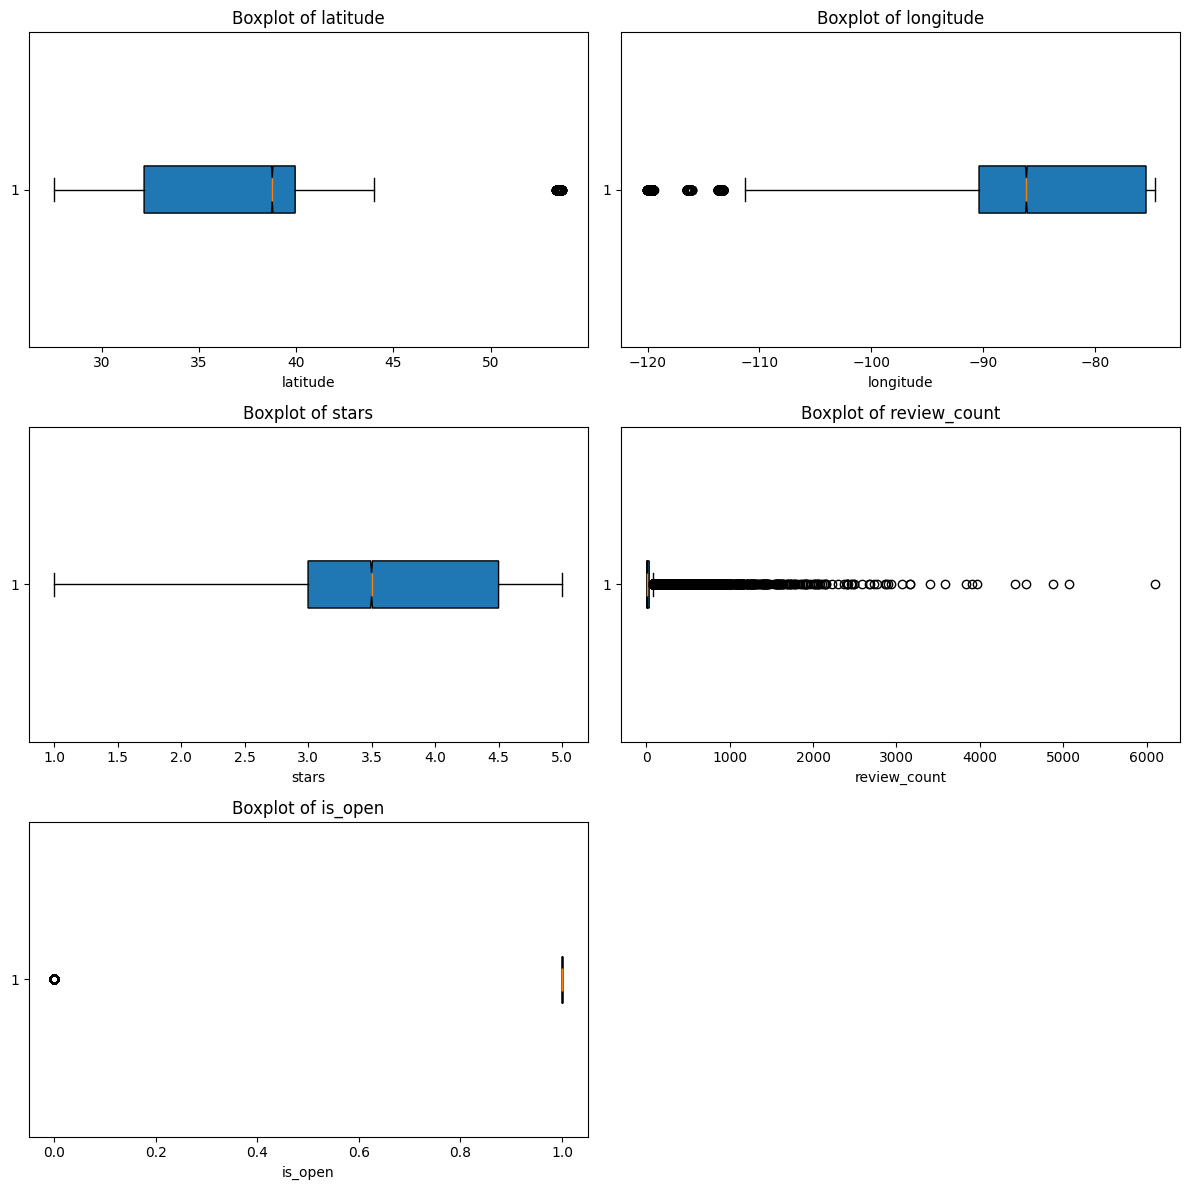

In [ ]:
numeric_columns = business.select_dtypes(include=['number']).columns
num_plots = len(numeric_columns)
num_cols = 2 
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    axes[i].boxplot(business[column].dropna(), vert=False, patch_artist=True, notch=True)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

6. Checking the outlier of the dataset

In [23]:
data = business.select_dtypes(include=['number'])
outliers_count = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outliers_count[column] = len(outliers)
outliers_summary = pd.DataFrame({
    'Column': outliers_count.keys(),
    'Outliers Count': outliers_count.values()})
print(outliers_summary)

         Column  Outliers Count
0      latitude            3702
1     longitude           15279
2         stars               0
3  review_count           12246
4       is_open           20380


7. Checking the duplicate of the dataset

In [24]:
duplicate_summary = {}
for column in business.columns:
    duplicate_count = business[column].duplicated().sum()
    duplicate_summary[column] = duplicate_count
duplicate_summary_df = pd.DataFrame({
    'Column': duplicate_summary.keys(),
    'Duplicate Count': duplicate_summary.values(),
    'Total Values': [business[col].count() for col in business.columns],
    'Duplicate Percentage (%)': [
        (duplicate_count / business[col].count()) * 100 if business[col].count() > 0 else 0 
        for duplicate_count, col in zip(duplicate_summary.values(), business.columns)]})
print(duplicate_summary_df)

          Column  Duplicate Count  Total Values  Duplicate Percentage (%)
0    business_id                0        100000                  0.000000
1           name            21945        100000                 21.945000
2        address            14761         96606                 15.279589
3           city            98793        100000                 98.793000
4          state            99976        100000                 99.976000
5    postal_code            97172         99958                 97.212829
6       latitude             7732        100000                  7.732000
7      longitude             9601        100000                  9.601000
8          stars            99991        100000                 99.991000
9   review_count            98987        100000                 98.987000
10       is_open            99998        100000                 99.998000
11    attributes            40549         90915                 44.601001
12    categories            42107     

### The preview dataset

1. Read the preview dataset

In [34]:
review=pd.read_csv('C:/Users/OS/MLBA_FinalProject/Restaurant-Recommendation-System/review.csv')
print(review)

                    review_id                 user_id             business_id  \
0      KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1      BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2      saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3      AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4      Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
...                       ...                     ...                     ...   
99995  pAEbIxvr6ebx2bHc1XvguA  SMH5CeiLvKx61lKwtLZ_PA  lV0k3BnslFRkuWD_kbKd0Q   
99996  xH1AoE-4nf2ECGQJRjO4_g  2clTdtp-BjphxLjN83CpUA  G0xz3kyRhRi6oZl7KfR0pA   
99997  GatIbXTz-WDru5emONUSIg  MRrN6DH3QGCFcDv5RENYVg  C4lZdhasjZVQyDlOiXY1sA   
99998  6NfkodAdhvI89xONXuBC3A  rnNQzeKJbvqVCsYsL10mkQ  dChRGpit9fM_kZK5pafNyA   
99999  sJ1BMq7lkKgOWEFx3n6ZRw  _BcWyKQL16ndpBdggh2kNA  hMcgO98QaOFmQVTfCUeGzw   

       stars  useful  funny

2. Dataset information

In [25]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


3. Descriptive analytics

In [26]:
review.describe()

,stars,useful,funny,cool
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.842910,0.898980,0.257180,0.347030
std,1.354729,2.205186,1.010212,1.066382
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,320.000000,98.000000,49.000000


4. Checking missing data

In [27]:
missing_data = review.isnull().sum()
missing_data_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Values': missing_data.values,
    'Percentage Missing (%)': (missing_data.values / len(review)) * 100})
print(missing_data_summary)

        Column  Missing Values  Percentage Missing (%)
0    review_id               0                     0.0
1      user_id               0                     0.0
2  business_id               0                     0.0
3        stars               0                     0.0
4       useful               0                     0.0
5        funny               0                     0.0
6         cool               0                     0.0
7         text               0                     0.0
8         date               0                     0.0


5. Boxplot describing

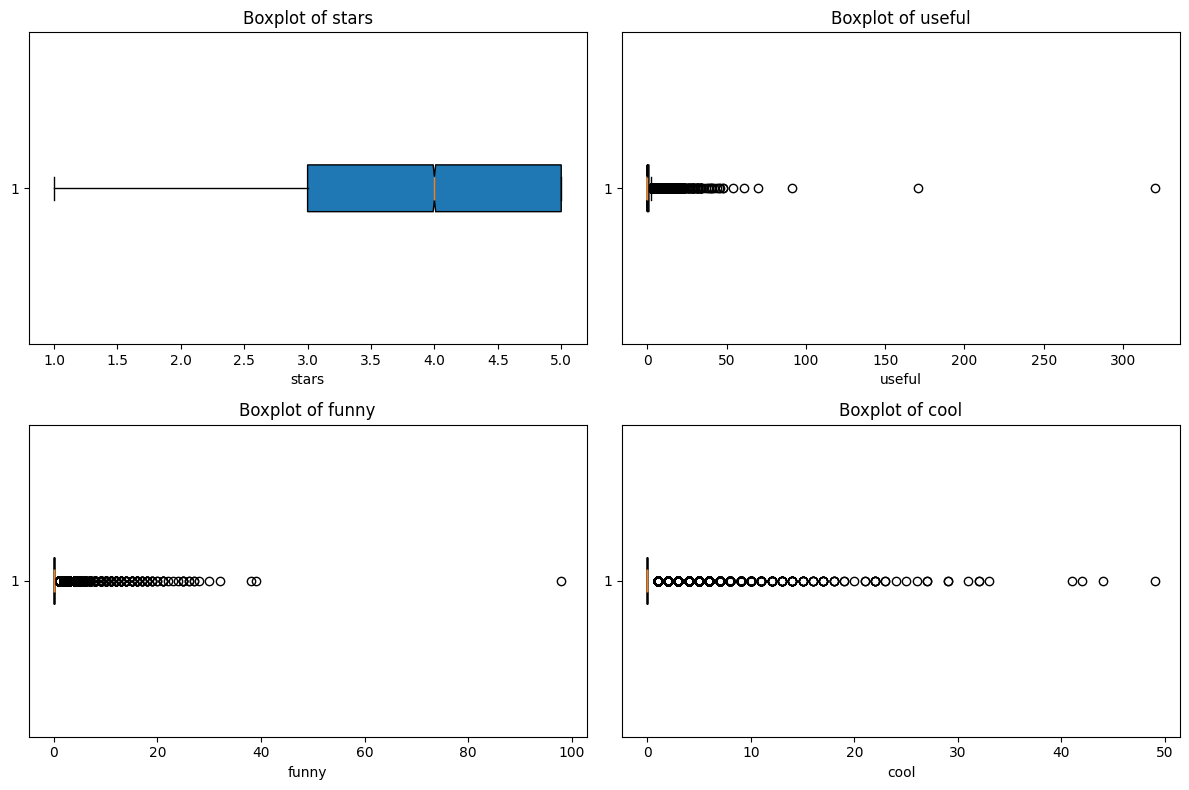

In [28]:
numeric_columns = review.select_dtypes(include=['number']).columns
num_plots = len(numeric_columns)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten() 
for i, column in enumerate(numeric_columns):
    axes[i].boxplot(review[column].dropna(), vert=False, patch_artist=True, notch=True)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

6. Checking the outlier of the dataset

In [29]:
data = review.select_dtypes(include=['number'])
outliers_count = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outliers_count[column] = len(outliers)
outliers_summary = pd.DataFrame({
    'Column': outliers_count.keys(),
    'Outliers Count': outliers_count.values()})
print(outliers_summary)

   Column  Outliers Count
0   stars               0
1  useful           10312
2   funny           14117
3    cool           20016


7. Checking the duplicate

In [30]:
duplicate_summary = {}
for column in review.columns:
    duplicate_count = review[column].duplicated().sum()
    duplicate_summary[column] = duplicate_count
duplicate_summary_review = pd.DataFrame({
    'Column': duplicate_summary.keys(),
    'Duplicate Count': duplicate_summary.values(),
    'Total Values': [review[col].count() for col in review.columns],
    'Duplicate Percentage (%)': [
        (duplicate_count / review[col].count()) * 100 if review[col].count() > 0 else 0 
        for duplicate_count, col in zip(duplicate_summary.values(), review.columns)]})
print(duplicate_summary_review)

          Column  Duplicate Count  Total Values  Duplicate Percentage (%)
0    business_id                0        100000                  0.000000
1           name            21945        100000                 21.945000
2        address            14761         96606                 15.279589
3           city            98793        100000                 98.793000
4          state            99976        100000                 99.976000
5    postal_code            97172         99958                 97.212829
6       latitude             7732        100000                  7.732000
7      longitude             9601        100000                  9.601000
8          stars            99991        100000                 99.991000
9   review_count            98987        100000                 98.987000
10       is_open            99998        100000                 99.998000
11    attributes            40549         90915                 44.601001
12    categories            42107     

## DATA PREPARATION

### Merge data

In [35]:
data=pd.merge(left=review , right=business, how='left', on='business_id')
data.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [36]:
print("Tên các cột:", data.columns.tolist())
print("Số dòng và số cột:", data.shape)
print("Số dòng:", data.shape[0])
print("Số cột:", data.shape[1])

Tên các cột: ['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny', 'cool', 'text', 'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count', 'is_open', 'attributes', 'categories', 'hours']
Số dòng và số cột: (100000, 22)
Số dòng: 100000
Số cột: 22


### Cleaning data

1. Rename column

In [37]:
data.rename(columns={'stars_x':'rating', 'stars_y':'b/s_rating'}, inplace=True)
data.head()

,review_id,user_id,business_id,rating,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,b/s_rating,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


2. Checking the missing data after merge

In [38]:
data.isna().sum()

review_id          0
user_id            0
business_id        0
rating             0
useful             0
funny              0
cool               0
text               0
date               0
name               0
address          819
city               0
state              0
postal_code        1
latitude           0
longitude          0
b/s_rating         0
review_count       0
is_open            0
attributes      1631
categories         4
hours           5824
dtype: int64

In [39]:
# Imputing missing values in the address column with "Not-Available"
data.address.fillna(value="Not-Available", inplace=True)
# Imputing missing values in the attributes column with "Not-Available" 
data.attributes.fillna(value="Not-Available", inplace=True)
# Imputing missing values in the categories column with "Not-Available" 
data.categories.fillna(value="Not-Available", inplace=True)
# Imputing missing values in the hours column with "Not-Available" 
data.hours.fillna(value="Not-Available", inplace=True)
# # Imputing missing values in the postal_code column with "Not-Available" 
# data.postal_code.fillna(value="Not-Available", inplace=True)
# previewing our changes
data.isna().sum()

C:\Users\OS\AppData\Local\Temp\ipykernel_21484\3632149484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.address.fillna(value="Not-Available", inplace=True)
C:\Users\OS\AppData\Local\Temp\ipykernel_21484\3632149484.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

review_id       0
user_id         0
business_id     0
rating          0
useful          0
funny           0
cool            0
text            0
date            0
name            0
address         0
city            0
state           0
postal_code     1
latitude        0
longitude       0
b/s_rating      0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

As the result abow, postal code has 1 missing value:

In [41]:
null_postal_code = data[data['postal_code'].isna()]
print(null_postal_code)

                    review_id                 user_id             business_id  \
69890  geFR4RXdw1cVPL98hQY0kw  ylTj0NNgNXNo06JULSiQMg  VEdEuOfDGhgRWO-PipfB7w   

       rating  useful  funny  cool  \
69890     5.0       8      1     1   

                                                    text                 date  \
69890  You people are Crazy..Jus saying..lol I joined...  2014-03-18 13:18:28   

                           name  ... state postal_code   latitude  longitude  \
69890  Fill A Seat Philadelphia  ...    PA         NaN  39.952335 -75.163789   

       b/s_rating  review_count  is_open                attributes  \
69890         3.0             6        0  {'GoodForKids': 'False'}   

                 categories          hours  
69890  Arts & Entertainment  Not-Available  

[1 rows x 22 columns]


Fill in the missing 

In [42]:
data['postal_code'].fillna('19147', inplace=True)

C:\Users\OS\AppData\Local\Temp\ipykernel_21484\4138412623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['postal_code'].fillna('19147', inplace=True)


3. Duplicate checking

In [ ]:
print("Duplicates: ",data.duplicated().sum())

There's no duplicate to address

### Data transformation

1. Convert columns to appropriate data types

In [45]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [44]:
user_ids = data[['user_id']].drop_duplicates().reset_index(drop=True).reset_index()
data = pd.merge(data, user_ids, how='left', on='user_id').drop('user_id', axis=1).rename(columns={'index': 'user_id'})
data['user_id'] = data['user_id'] + 1

In [46]:
business_ids = data[['business_id']].drop_duplicates().reset_index(drop=True).reset_index()
data = pd.merge(data, business_ids, how='left', on='business_id').drop('business_id', axis=1).rename(
    columns={'index': 'business_id'})
data['business_id'] = data['business_id'] + 1

Output the first few rows of the modified DataFrame


In [47]:
print(data.head())

                review_id  rating  useful  funny  cool  \
0  KU_O5udG6zpxOg-VcAEodg     3.0       0      0     0   
1  BiTunyQ73aT9WBnpR9DZGw     5.0       1      0     1   
2  saUsX_uimxRlCVr67Z4Jig     3.0       0      0     0   
3  AqPFMleE6RsU23_auESxiA     5.0       1      0     1   
4  Sx8TMOWLNuJBWer-0pcmoA     4.0       1      0     1   

                                                text                date  \
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30   
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03   
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15   

                           name                   address          city  ...  \
0  Turning Point of North Wales       1460 Bethlehem Pike   North Wales  ...   
1    Body Cycle Spinning Studio  1

2. Combine the address columns into a single 'location' column

In [48]:
data['location'] = data.apply(
    lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ",axis=1)

Drop the original columns 'state', 'city', and 'address'

In [49]:
data.drop(columns=['state', 'city', 'address'], inplace=True)

In [50]:
print(data['location'])

0        State:PA, City:North Wales, Address:1460 Bethl...
1        State:PA, City:Philadelphia, Address:1923 Ches...
2        State:AZ, City:Tucson, Address:748 W Starr Pas...
3        State:PA, City:Philadelphia, Address:2481 Gran...
4        State:LA, City:New Orleans, Address:2549 Banks...
                               ...                        
99995    State:IN, City:Indianapolis, Address:2258 W 86...
99996    State:PA, City:East Norriton, Address:2961 Swe...
99997    State:PA, City:Malvern, Address:215 Lancaster ...
99998    State:PA, City:Philadelphia, Address:130 S 18t...
99999    State:PA, City:Philadelphia, Address:1601 Waln...
Name: location, Length: 100000, dtype: object


3. Extract the price values

In [51]:
def Price(val):
    """
    The function takes in a dictionary as input and extracts the price in the 'RestaurantsPriceRange2' key.
    Returns '0' if the value is 'Not-Available' or the key does not exist.
    """
    # Evaluates the values of the attributes as a dictionary because they have the dictionary structure but are of type string
    try:
        p = eval(val)['RestaurantsPriceRange2']  # Extracts the price value in the 'RestaurantsPriceRange2' key
        return int(p)  # Returns the price as an integer
    except:
        return 0  # Returns zero if the 'RestaurantsPriceRange2' key is not listed or there's an error

Applying the function to the 'attributes' column

In [52]:
data['price'] = data['attributes'].apply(Price)
print(data[['price']])

       price
0          2
1          0
2          1
3          2
4          2
...      ...
99995      2
99996      0
99997      2
99998      2
99999      0

[100000 rows x 1 columns]


4. Selecting only the restaurants

In [53]:
data = data.loc[data.categories.str.contains('Restaurants')].copy().reset_index(drop=True)
print(data['categories'])

0        Restaurants, Breakfast & Brunch, Food, Juice B...
1                          Restaurants, Breakfast & Brunch
2                    Halal, Pakistani, Restaurants, Indian
3        Sandwiches, Beer, Wine & Spirits, Bars, Food, ...
4               Mediterranean, Restaurants, Seafood, Greek
                               ...                        
72119    Bars, Beer, Wine & Spirits, Restaurants, Loung...
72120    Venues & Event Spaces, Italian, Event Planning...
72121    American (Traditional), Breakfast & Brunch, Re...
72122                                 Mexican, Restaurants
72123    Restaurants, American (New), Breakfast & Brunc...
Name: categories, Length: 72124, dtype: object


Droping irrelevant columns

In [54]:
cols = ['useful', 'postal_code', 'funny', 'cool', 'is_open', 'review_id']
data.drop(columns=cols, axis=1, inplace=True)

## Exploratory Data Analysis-EDA

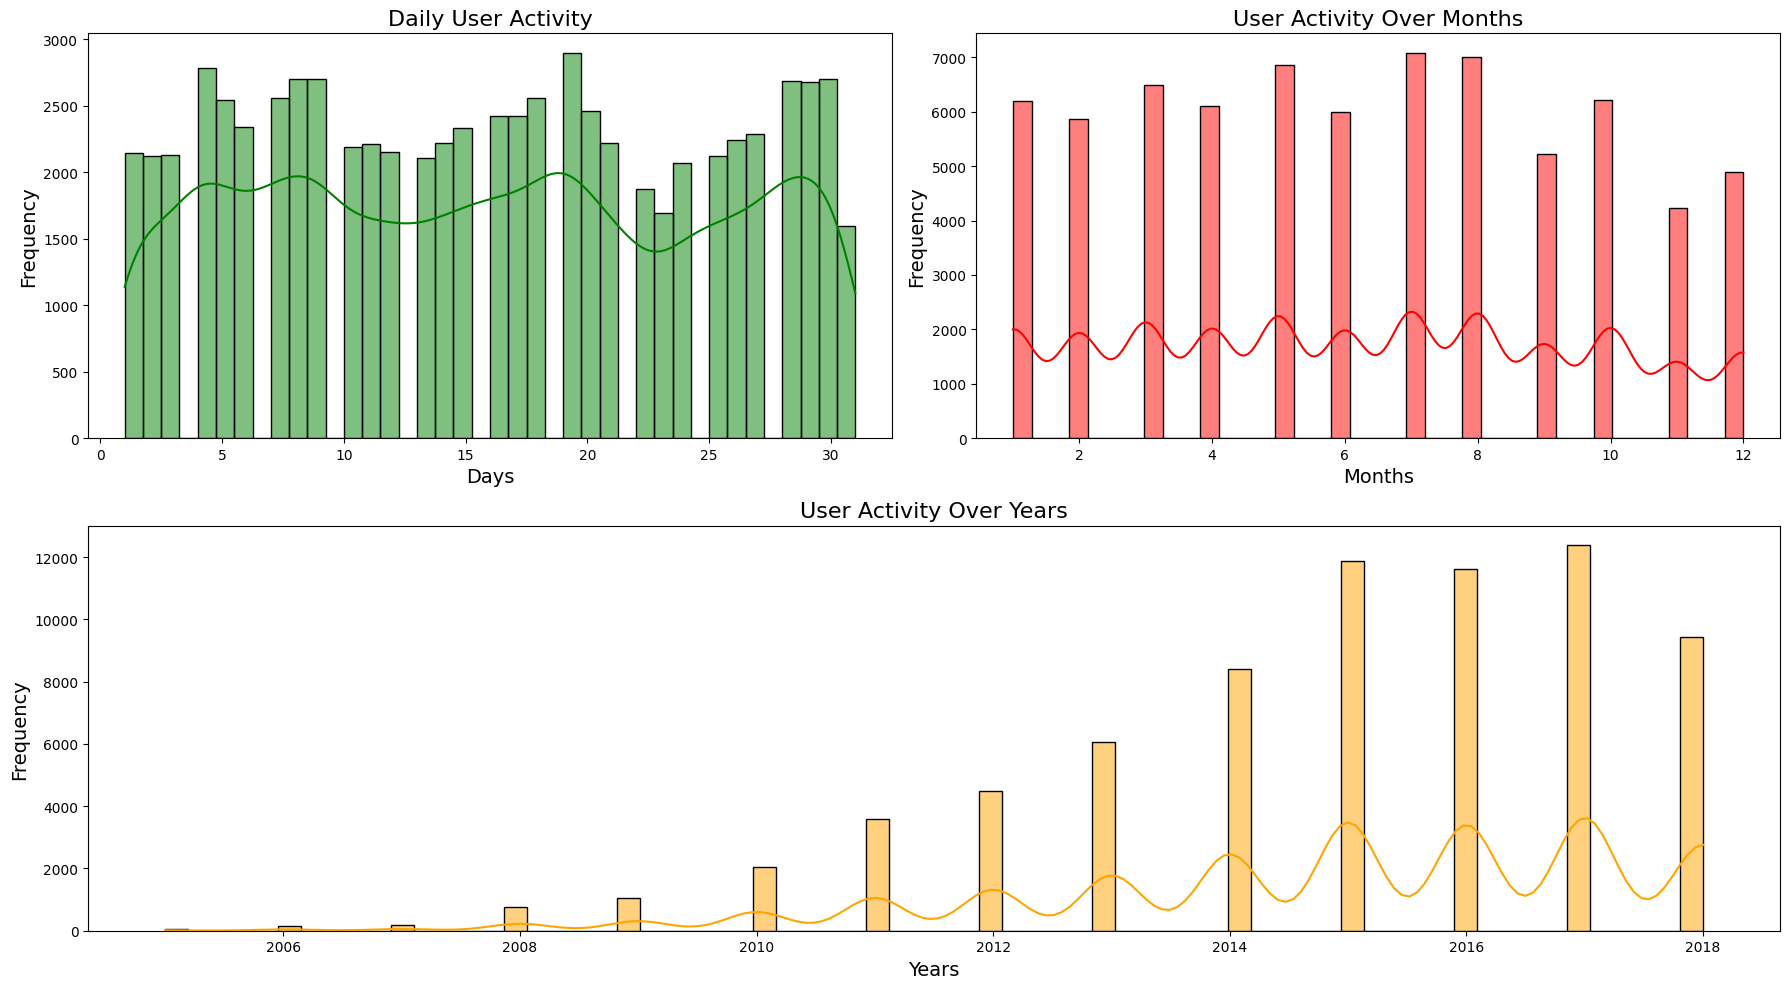

In [57]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(data['date'].dt.day, color='green', kde=True, ax=ax1)
ax1.set_title('Daily User Activity', fontsize=16)
ax1.set_xlabel('Days', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)

ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(data['date'].dt.month, color='red', kde=True, ax=ax2)
ax2.set_title('User Activity Over Months', fontsize=16)
ax2.set_xlabel('Months', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)

ax3 = fig.add_subplot(gs[1, :])
sns.histplot(data['date'].dt.year, color='orange', kde=True, ax=ax3)
ax3.set_title('User Activity Over Years', fontsize=16)
ax3.set_xlabel('Years', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

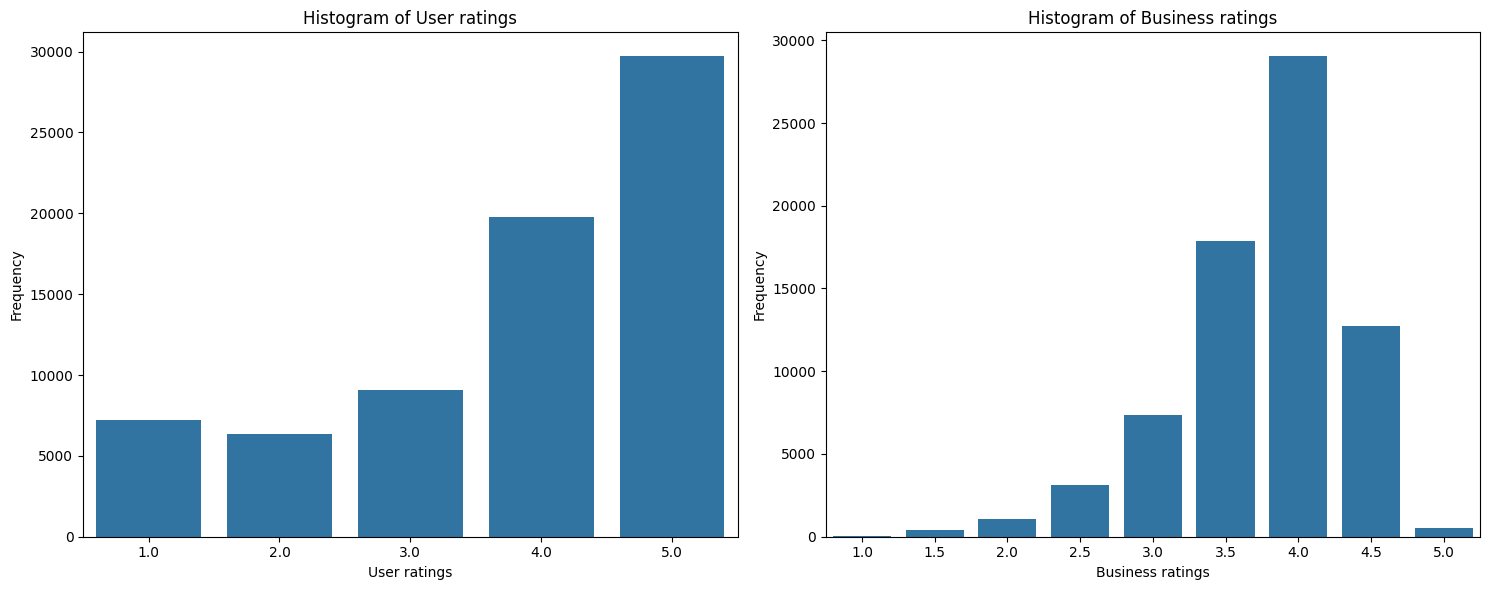

In [58]:
column1 = 'rating'
column2 = 'b/s_rating'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  
sns.countplot(data=data, x=column1 ,ax=axes[0] , color='tab:blue')
axes[0].set_xlabel("User ratings")
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of User ratings')

sns.countplot(data=data, x=column2,ax=axes[1] ,color='tab:blue')
axes[1].set_xlabel("Business ratings")
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Business ratings')
plt.tight_layout()
plt.show()

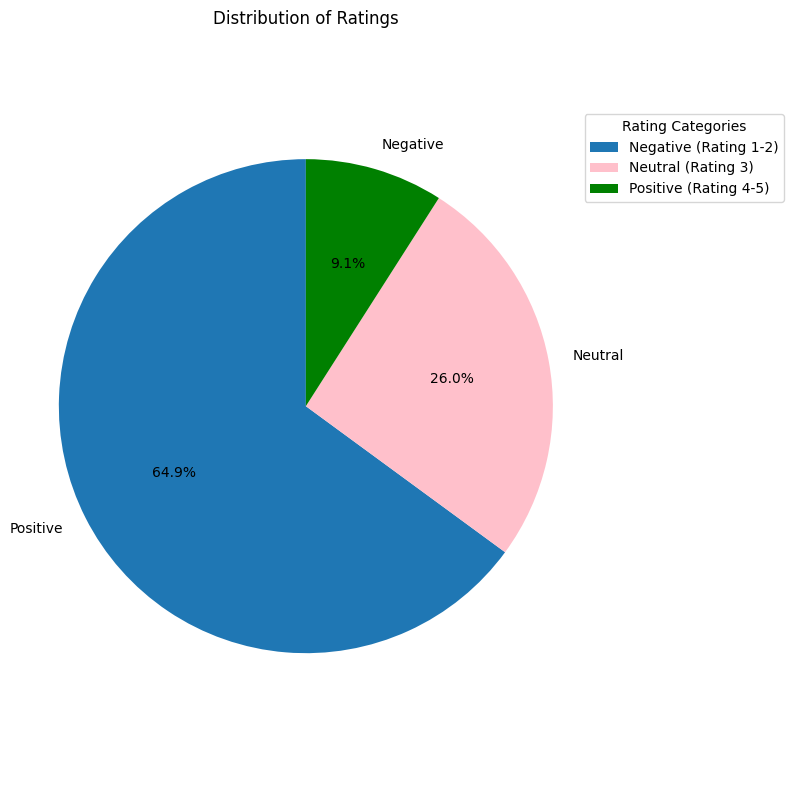

In [59]:
data = data.drop_duplicates('business_id')
data['rating_category'] = pd.cut(
    data['b/s_rating'], 
    bins=[-float('inf'), 2, 3, float('inf')],  
    labels=['Negative', 'Neutral', 'Positive'] 
)
rating_counts = data['rating_category'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    rating_counts, 
    labels=rating_counts.index,  
    autopct='%1.1f%%',  
    startangle=90,  
    colors=['tab:blue', 'pink', 'green'],  
    textprops=dict(color="black")) 

plt.legend(
    labels=[
        "Negative (Rating 1-2)", 
        "Neutral (Rating 3)", 
        "Positive (Rating 4-5)"], 
    title="Rating Categories", 
    loc="upper left",  
    bbox_to_anchor=(1, 0.9))

plt.title('Distribution of Ratings')  
plt.axis('equal')  
plt.tight_layout()  
plt.show()

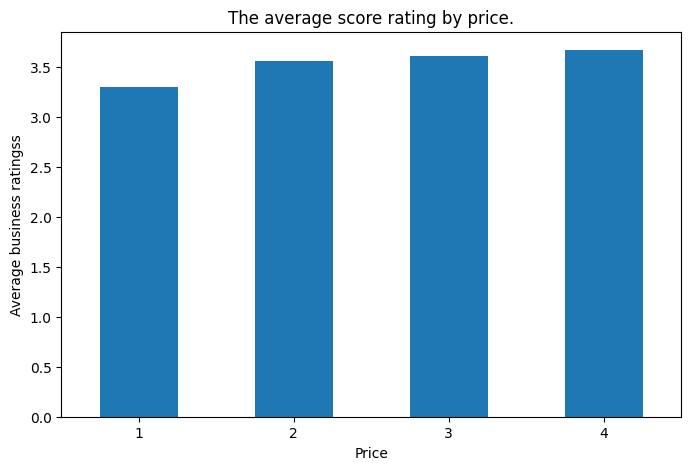

In [60]:
df_filtered = data[data['price'].isin([1, 2, 3, 4])]
avg_b_s_rating = df_filtered.groupby('price')['b/s_rating'].mean()
plt.figure(figsize=(8, 5))
ax = avg_b_s_rating.plot(kind='bar', color='tab:blue')
plt.title('The average score rating by price.')
plt.xlabel('Price')
plt.ylabel('Average business ratingss')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
plt.show()

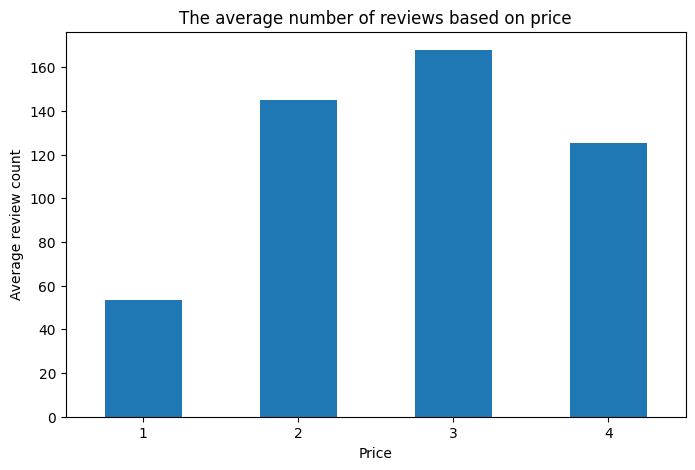

In [61]:
avg_b_s_rating = df_filtered.groupby('price')['review_count'].mean()
plt.figure(figsize=(8, 5))
ax = avg_b_s_rating.plot(kind='bar', color='tab:blue')
plt.title('The average number of reviews based on price')
plt.xlabel('Price')
plt.ylabel('Average review count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
plt.show()

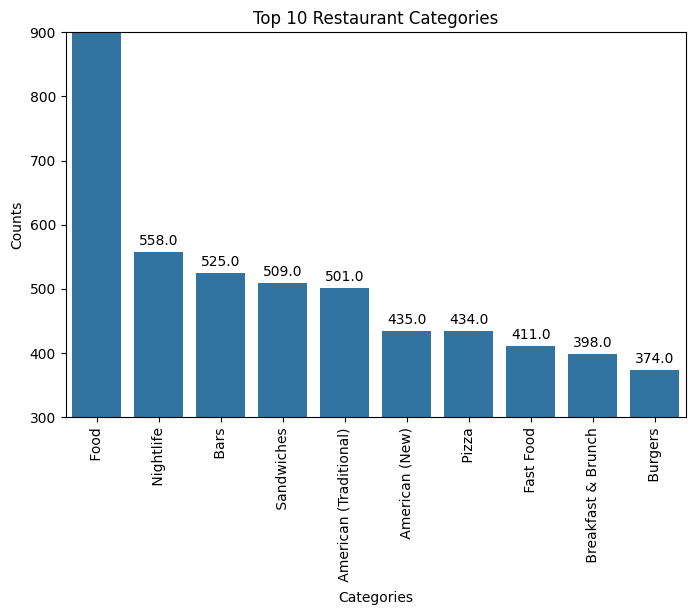

In [62]:
categories=[cat for category in data.drop_duplicates('business_id').categories for cat in category.split(',')]
categories=collections.Counter(categories)
common=categories.most_common(12)
fig, ax=plt.subplots(figsize=(8,5))
x=[i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([300,900])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');

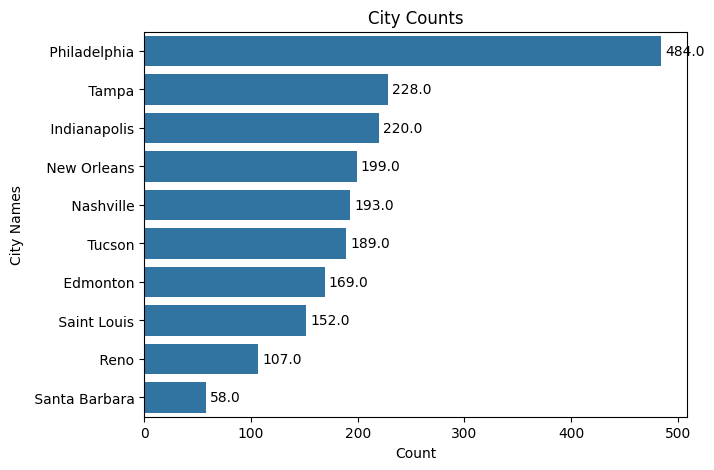

In [63]:
location= data.drop_duplicates('business_id')[['location']]
city=location.location.apply(lambda x: x.split(',')[1].replace("City:",'')) 
city=collections.Counter(city)
city=city.most_common(10)
y=[i[0] for i in city]
x=[i[1] for i in city]
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot( y=y, x=x, color='tab:blue')
ax.set_ylabel("City Names")
ax.set_xlabel("Count")
ax.set_title("City Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

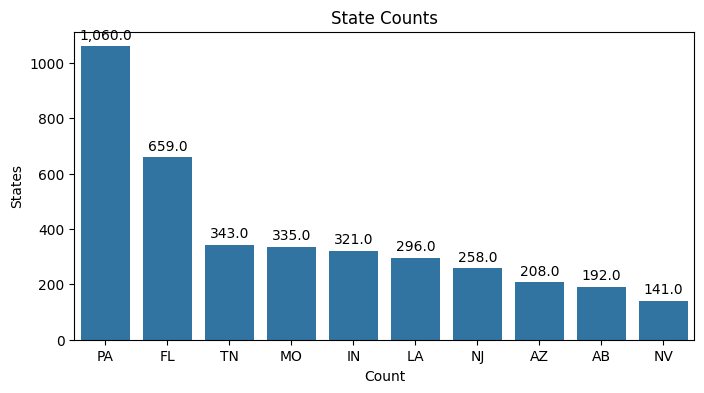

In [64]:
states=location.location.apply(lambda x: x.split(',')[0].replace("State:",'')) 
states=collections.Counter(states)
states=states.most_common(10)
y=[i[0] for i in states]
x=[i[1] for i in states]
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot( y=x,x=y , color='tab:blue')
ax.set_ylabel("States")
ax.set_xlabel("Count")
ax.set_title("State Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

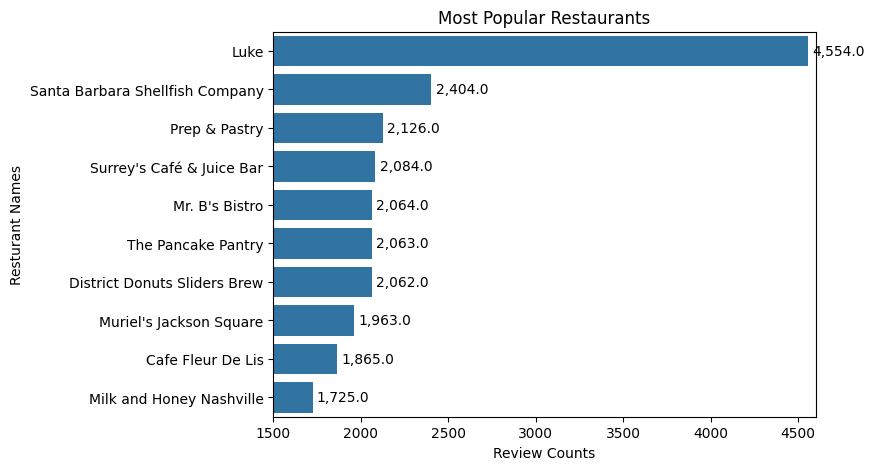

In [66]:
index=data.drop_duplicates(subset='business_id').sort_values(by=['review_count','b/s_rating'],ascending=False)[:10].index
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot(data=data.loc[index], x="review_count", y='name', color='tab:blue')
ax.set_ylabel("Resturant Names")
ax.set_xlabel("Review Counts")
ax.set_xlim([1500,4600])
ax.set_title("Most Popular Restaurants");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

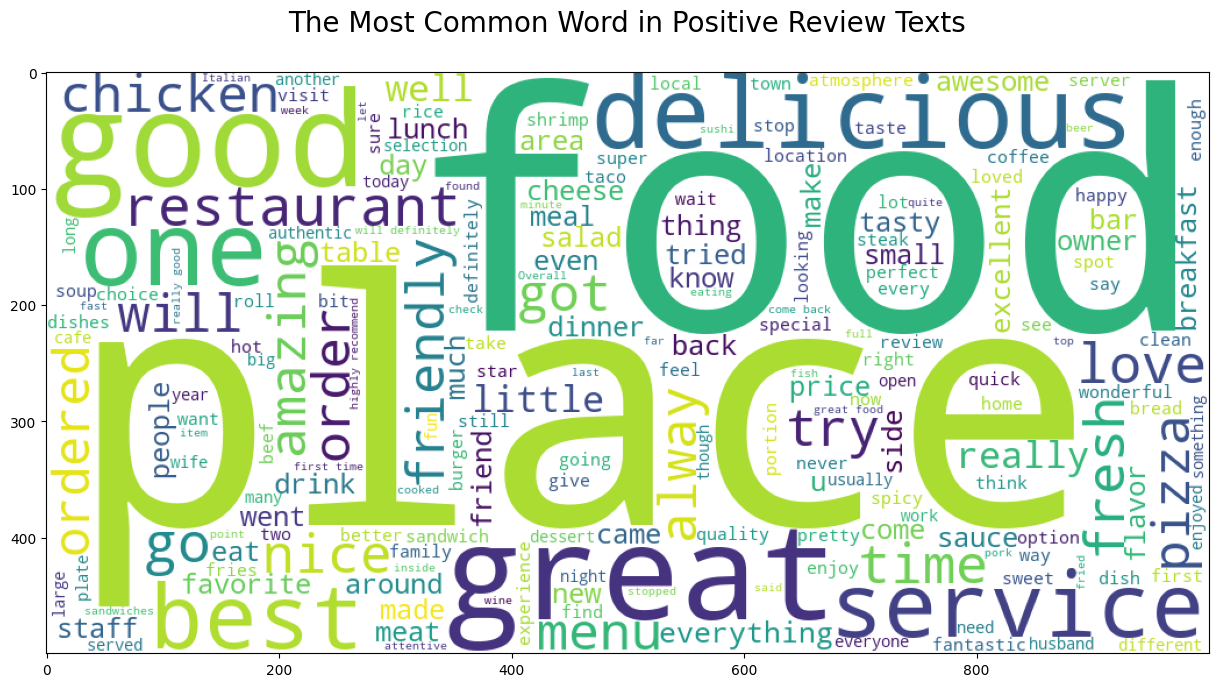

In [68]:
data=data.loc[ (data['rating']>=4)& (data['b/s_rating']>=4)] 
plt.figure(figsize=(15,15))            
plt.title('The Most Common Word in Positive Review Texts\n', fontsize=20) 
wc = WordCloud(max_words=200, min_font_size=10,height=500,width=1000,background_color="white")\
        .generate(' '.join(data['text']))
plt.imshow(wc);

ValueError: We need at least 1 word to plot a word cloud, got 0.

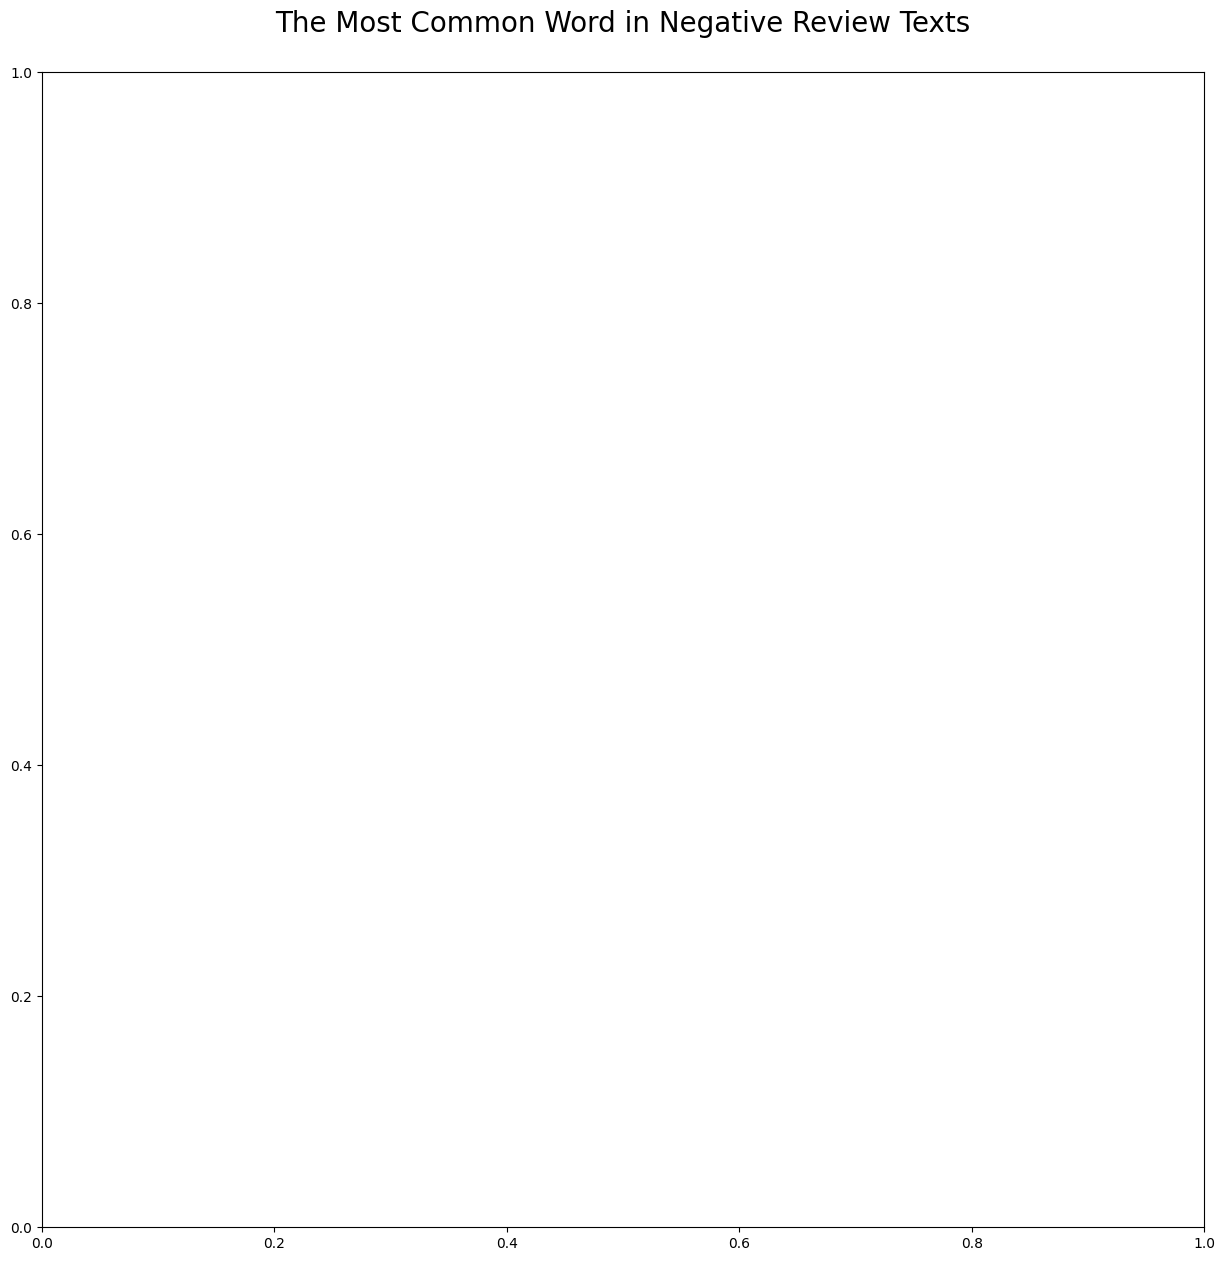

In [69]:
# creating a word count plot for the positive reviews
# selecting only negative reviews i.e reviews with 2 and below ratings
data=data.loc[(data['rating']<=1)& (data['b/s_rating']<=1)]
plt.figure(figsize=(15,15))
plt.title('The Most Common Word in Negative Review Texts\n', fontsize=20)
wc = WordCloud(max_words=200,height=500,width=1000,background_color="white")\
        .generate(' '.join(data['text'])) 
plt.imshow(wc);

In [71]:
# Set up center latitude and longitude
import folium
center_lat = data['latitude'][0]
center_long = data['longitude'][0]
map_ =folium.Map([center_lat,center_long], zoom_start=5)
limit=1000
for index in range(limit):
    lat = data.iloc[index]['latitude']
    long = data.iloc[index]['longitude']
    name = data.iloc[index]['name']
    rating = data.iloc[index]['b/s_rating']
    location = data.iloc[index]['location']
    details = "{}\nStars: {} {}".format(name, rating, location)
    popup = folium.Popup(details, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(map_)
map_

KeyError: 0